## Logestic Regression

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

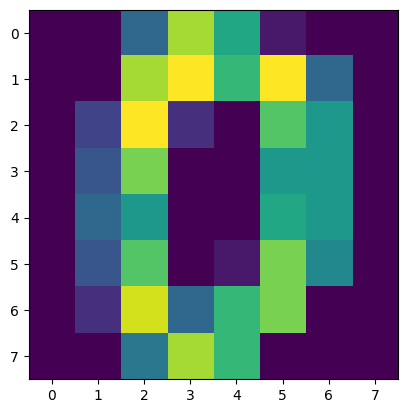

In [4]:
plt.imshow(digits.images[0])

In [5]:
from numpy import asarray

asarray(digits.images[0])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
X=digits.data
y=digits.target

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
L_R=LogisticRegression()

In [9]:
L_R.fit(X_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred=L_R.predict(X_test)

In [11]:
L_R.score(X_train,y_train)

1.0

In [12]:
L_R.score(X_test,y_test)

0.9777777777777777

In [13]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

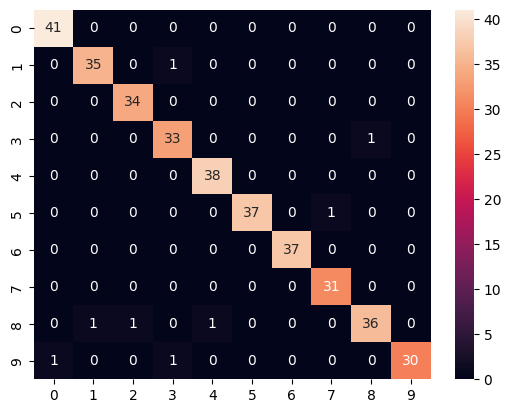

In [14]:
sns.heatmap(cm,annot=True)

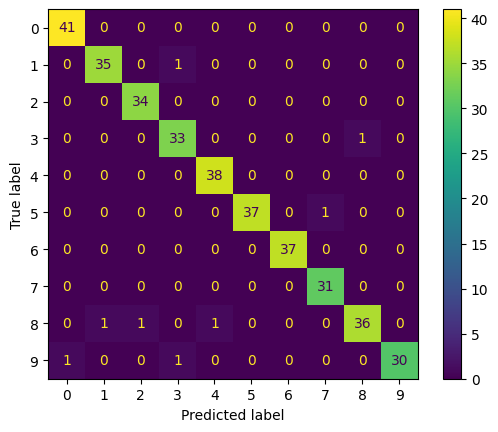

In [15]:
graph=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9] )
graph.plot()
plt.show()

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.97      0.97      0.97        36
           2       0.97      1.00      0.99        34
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        38
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.98        31
           8       0.97      0.92      0.95        39
           9       1.00      0.94      0.97        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Now making the neural Network to pcredits hand written pictures , we will not use the labeled data 

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf 
from tensorflow import keras


In [18]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

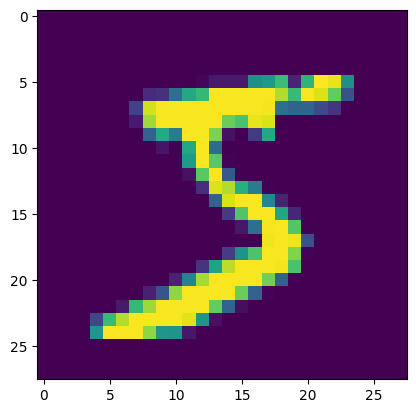

In [19]:
plt.imshow(X_train[0])

In [20]:
# Means we are standarizing the data , it will give the better output
X_test=X_test/255
X_train=X_train/255

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
#so we will convert it into two dimensions 
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_train_flatten.shape

(60000, 784)

In [24]:
#so we will convert it into two dimensions 
X_test_flatten=X_test.reshape(len(X_test),28*28)
X_test_flatten.shape

(10000, 784)

In [25]:
# now making a neural network 
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile( optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=5)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8156 - loss: 0.7152
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9121 - loss: 0.3114
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9201 - loss: 0.2889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9261 - loss: 0.2676
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9272 - loss: 0.2613


In [26]:
model.evaluate(X_train_flatten,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9292 - loss: 0.2546


[0.2561061382293701, 0.9288333058357239]

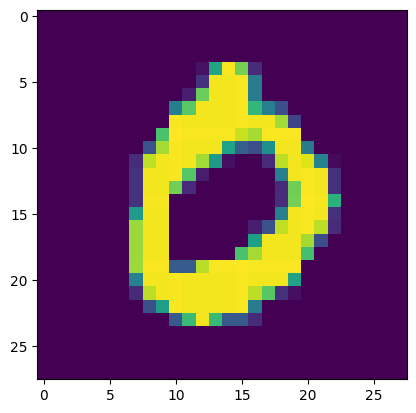

In [27]:
plt.imshow(X_test[3])

In [28]:
y_pred=model.predict(X_test_flatten)
np.argmax(y_pred[3])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0

In [29]:
y_predicted_labels=[np.argmax(i) for i in y_pred ]
y_predicted_labels[:6]

[7, 2, 1, 0, 4, 1]

In [30]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9140 - loss: 0.3008


[0.26478663086891174, 0.9244999885559082]

In [31]:
Cm=confusion_matrix(y_test,y_predicted_labels)

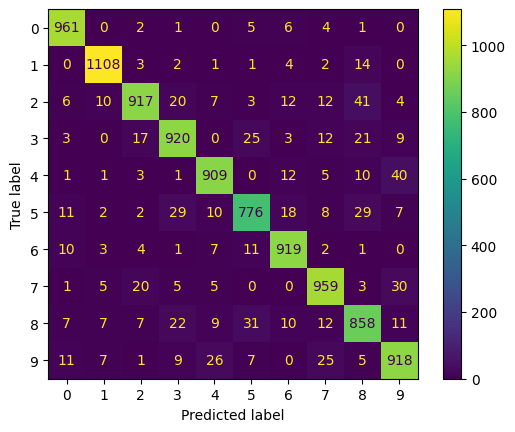

In [32]:
graph=ConfusionMatrixDisplay(Cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
graph.plot()
plt.show()


In [33]:
# now making a neural network 
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile( optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=5)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8674 - loss: 0.4665
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9618 - loss: 0.1295
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9733 - loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9805 - loss: 0.0639
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0517


In [34]:
y_pred=model.predict(X_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
y_predicted_labels=[ np.argmax(i) for i in y_pred ]

In [36]:
cm=confusion_matrix(y_test,y_predicted_labels)

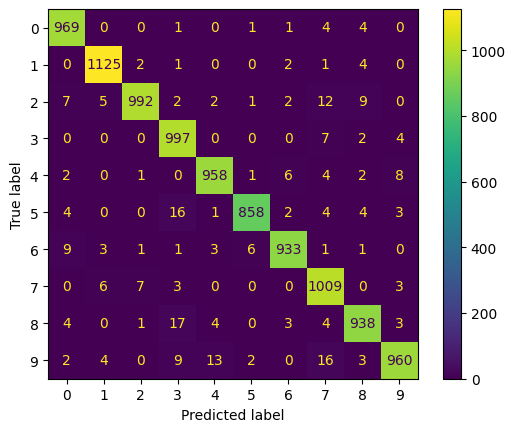

In [37]:
graph=ConfusionMatrixDisplay(cm, display_labels=range(0,10))
graph.plot()

## Nowing Doing the tracking on TensorBoard through the Adm optimizer

In [38]:
# now trying with the date which is not flattened  
model1=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(10,activation='sigmoid')
])
model1.compile(loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy']
              ,optimizer='adam')

tensor_board=tf.keras.callbacks.TensorBoard(log_dir='logs/adm',histogram_freq=1)

model1.fit(X_train,y_train,epochs=10,callbacks=[tensor_board])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8738 - loss: 0.4456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9613 - loss: 0.1335
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9745 - loss: 0.0898
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9808 - loss: 0.0640
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0494
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0377
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9895 - loss: 0.0326
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0278
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9940 - loss: 0.0207
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9944 - loss: 0.0183


In [39]:
y_pred=model1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
y_predicted_labels=[np.argmax(i) for i in y_pred]

In [41]:
cm=confusion_matrix(y_test,y_predicted_labels)

<Axes: >

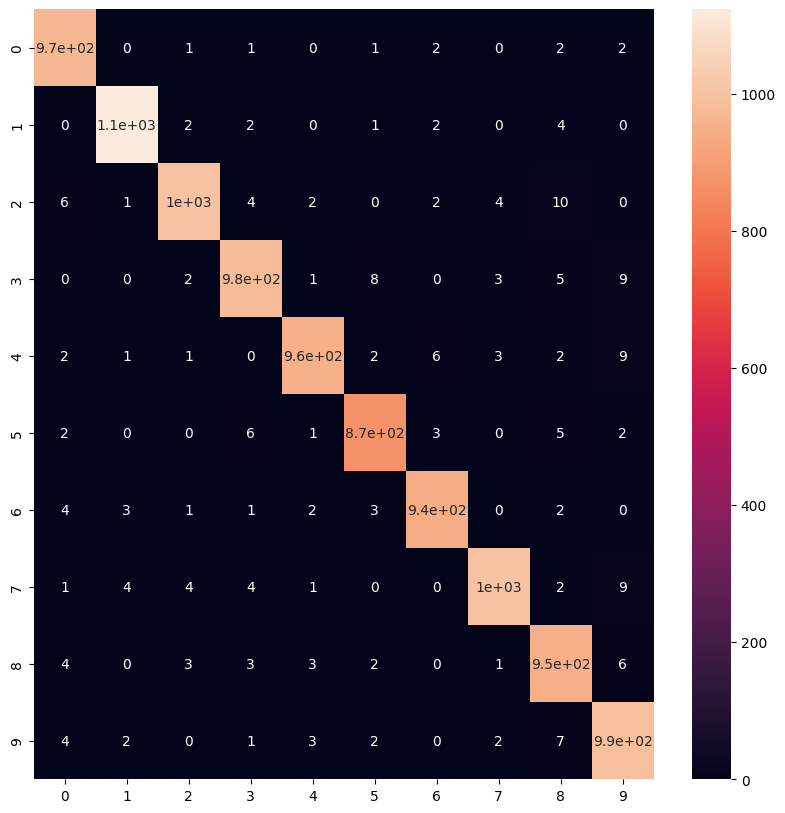

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

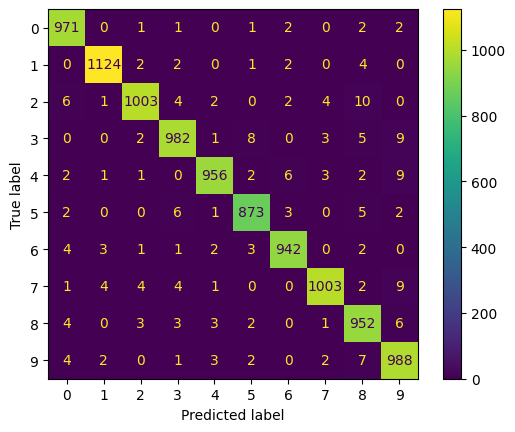

In [43]:
graph=ConfusionMatrixDisplay(cm,display_labels=range(0,10))
graph.plot()

## Nowing Doing the tracking on TensorBoard through the stocastic Gradient Descent optimizer

In [44]:
# now trying with the date which is not flattened  
model1=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(10,activation='sigmoid')
])
model1.compile(loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy']
              ,optimizer='SGD')

tensor_board=tf.keras.callbacks.TensorBoard(log_dir='logs/SGD',histogram_freq=1)

model1.fit(X_train,y_train,epochs=10,callbacks=[tensor_board])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7180 - loss: 1.0787
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8995 - loss: 0.3601
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9159 - loss: 0.2989
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9238 - loss: 0.2675
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9312 - loss: 0.2438
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9358 - loss: 0.2233
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9417 - loss: 0.2059
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9456 - loss: 0.1911
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9492 - loss: 0.1806
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9536 - loss: 0.1667


In [45]:
## now we are writting with differnent optimers and we will compare them  using tensorboard

In [46]:
# now trying with the date which is not flattened  
from tensorflow import keras 
model1=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(10,activation='sigmoid')
])
model1.compile(loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy']
              ,optimizer='Lion')

tensor_board=tf.keras.callbacks.TensorBoard(log_dir='logs/Lion',histogram_freq=1)

model1.fit(X_train,y_train,epochs=10,callbacks=[tensor_board])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8793 - loss: 0.4231
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9508 - loss: 0.1798
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9564 - loss: 0.1634
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9596 - loss: 0.1516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9590 - loss: 0.1587
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9614 - loss: 0.1522
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9625 - loss: 0.1645
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9620 - loss: 0.1541
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9603 - loss: 0.1590
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9639 - loss: 0.1557


## Command for the running the tenserboard 
## run it in any terminal with the specific directory
## tensorboard -- log_dir logs/